# Week 12 Homework

In [1]:
# Initial Set-Up
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import time

##### 1.	In 250-500 words, write a thorough discussion of when to use ML and when not to. Do NOT go over the 500-word limit. It is essential to express this concisely. This should be informed by the Machine Learning for Business DataCamp course. 


The decision to utilize Machine Learning or not is based on the answers to several important questions, which I have outlined here:
####  i)  Do you have ideas as to why this situation has occurred?  
Examining the driving causes behind a noticeable change in outcomes for a business is a key piece to determining whether Machine Learning can help.
#### ii)  Do you have enough data to accurately examine the situation?  
If there is insufficient data, machine learning is not a good idea.  This lack of data could be due to not enough time passing since the change began, or it could be because the data is not readily accessible or easily extracted from the body of data available.  
#### iii)  Can we use Machine Learning to predict what is needed for addressing the situation in a practical way?  
In other words, are you able to make predictions based on the knowledge available that allow the business to act accordingly? 
#### iv) Is Machine Learning the fiscally responsible decision for the business?  
If the cost of Machine Learning requires more time and/or money than that which is gained after Machine Learning has been utilized, then it would be foolish for a business to invest in it.
#### v)  Is the potential solution actionable?  
Can the potential plan for improving the situation be rolled out to all customers or people involved in such a way that is cost-effective and impactful? This question is answered best through examining accuracy, precision, recall, and error.  Accuracy tells us what percentage of the predictions made by the model were accurate, whereas precision tells what percentage of those predicted to churn actually did churn.  Recall tells us what percentage of those expected to churn were captured by the model.   And finally, the regression error tells us how accurate the model actually fits the data based on how far each data point is from the value predicted by the model.  All of these metrics need to be considered thoroughly to determine whether a model can be rolled out to a larger population.

##### 2.	Perform pre-processing on the Lending Club dataset from class. Clearly use markdown to indicate each pre-processing step you are using. Note: you should use at least three different techniques. 


In [2]:
loans=pd.read_csv('loans_full_schema.csv')
loans_df=pd.DataFrame(loans)
loans_df.head()

,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,sub_grade,issue_month,loan_status,initial_listing_status,disbursement_method,balance,paid_total,paid_principal,paid_interest,paid_late_fees
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,NaN,NaN,...,C3,18-Mar,Current,whole,Cash,27015.86,1999.33,984.14,1015.19,0.0
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,NaN,NaN,...,C1,18-Feb,Current,whole,Cash,4651.37,499.12,348.63,150.49,0.0
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,NaN,NaN,...,D1,18-Feb,Current,fractional,Cash,1824.63,281.80,175.37,106.43,0.0
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,NaN,NaN,...,A3,18-Jan,Current,whole,Cash,18853.26,3312.89,2746.74,566.15,0.0
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,C3,18-Mar,Current,whole,Cash,21430.15,2324.65,1569.85,754.80,0.0


In [3]:
# Drop categorical data with more than 3 unique values (for the sake of converting to numerical)

# create Series containing number of unique entries by column
num_unique = loans_df.nunique(axis=0)

# create a list of categorical columns with 3 or fewer unique values
lil_unique_col = []
for i in range(len(loans_df.columns)):
    try:        
        if num_unique[i] < 4:
            lil_unique_col.append(loans_df.columns[i])
    except Exception as e:
        print(e)

# create List containing columns with categorical data
cat_list = loans_df.select_dtypes(include=['object']).columns.tolist ()
cat_list

lil_unique_cat = list(set(lil_unique_col) & set(cat_list))
lil_unique_cat

['application_type',
 'verification_income_joint',
 'initial_listing_status',
 'homeownership',
 'issue_month',
 'verified_income',
 'disbursement_method']

In [4]:
# Leave this column as is (not as important, IMO)
loans_df['issue_month'].unique()

array(['18-Mar', '18-Feb', '18-Jan'], dtype=object)

In [5]:
# Leave this column as is (not as important, IMO)
loans_df['initial_listing_status'].unique()

array(['whole', 'fractional'], dtype=object)

In [6]:
# Convert to numerical
loans_df['verified_income'].unique()
loans_df['verified_income_num'],x =pd.factorize(loans_df['verified_income'])
print(x, loans_df['verified_income_num'])

Index(['Verified', 'Not Verified', 'Source Verified'], dtype='object') 0       0
1       1
2       2
3       1
4       0
       ..
9995    2
9996    0
9997    0
9998    2
9999    1
Name: verified_income_num, Length: 10000, dtype: int64


In [7]:
# Convert to numerical
loans_df['disbursement_method'].unique()
loans_df['disbursement_method_num'],x =pd.factorize(loans_df['disbursement_method'])
print(x, loans_df['disbursement_method_num'])

Index(['Cash', 'DirectPay'], dtype='object') 0       0
1       0
2       0
3       0
4       0
       ..
9995    0
9996    0
9997    0
9998    0
9999    0
Name: disbursement_method_num, Length: 10000, dtype: int64


In [8]:
# Convert to numerical
loans_df['application_type'].unique()
loans_df['application_type_num'],x =pd.factorize(loans_df['application_type'])
print(x, loans_df['application_type_num'])

Index(['individual', 'joint'], dtype='object') 0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    1
9998    0
9999    0
Name: application_type_num, Length: 10000, dtype: int64


In [9]:
# Fill NaNs and convert categorical to numerical
loans_df['verification_income_joint'].unique()
loans_df['verification_income_joint'] = loans_df['verification_income_joint'].fillna(0)
loans_df['verification_income_joint_num'],x =pd.factorize(loans_df['verification_income_joint'])
print(x, loans_df['verification_income_joint_num'])

Index([0, 'Verified', 'Not Verified', 'Source Verified'], dtype='object') 0       0
1       0
2       0
3       0
4       1
       ..
9995    0
9996    0
9997    3
9998    0
9999    0
Name: verification_income_joint_num, Length: 10000, dtype: int64


In [10]:
# Convert to numerical
loans_df['homeownership'].unique()
loans_df['homeownership_num'],x =pd.factorize(loans_df['homeownership'])
print(x, loans_df['homeownership_num'])

Index(['MORTGAGE', 'RENT', 'OWN'], dtype='object') 0       0
1       1
2       1
3       1
4       1
       ..
9995    1
9996    0
9997    0
9998    0
9999    1
Name: homeownership_num, Length: 10000, dtype: int64


In [11]:
#Create dataframe with only numerical data and no NaNs
num_loans = loans_df.select_dtypes(exclude='object')
filled_num_loans=num_loans.fillna(0)
filled_num_loans.head()

,emp_length,annual_income,debt_to_income,annual_income_joint,debt_to_income_joint,delinq_2y,months_since_last_delinq,earliest_credit_line,inquiries_last_12m,total_credit_lines,...,balance,paid_total,paid_principal,paid_interest,paid_late_fees,verified_income_num,disbursement_method_num,application_type_num,verification_income_joint_num,homeownership_num
0,3.0,90000.0,18.01,0.0,0.00,0,38.0,2001,6,28,...,27015.86,1999.33,984.14,1015.19,0.0,0,0,0,0,0
1,10.0,40000.0,5.04,0.0,0.00,0,0.0,1996,1,30,...,4651.37,499.12,348.63,150.49,0.0,1,0,0,0,1
2,3.0,40000.0,21.15,0.0,0.00,0,28.0,2006,4,31,...,1824.63,281.80,175.37,106.43,0.0,2,0,0,0,1
3,1.0,30000.0,10.16,0.0,0.00,0,0.0,2007,0,4,...,18853.26,3312.89,2746.74,566.15,0.0,1,0,0,0,1
4,10.0,35000.0,57.96,57000.0,37.66,0,0.0,2008,7,22,...,21430.15,2324.65,1569.85,754.80,0.0,0,0,1,1,1


In [12]:
# Create new column for total % credit used (to be used in heatmap later)
filled_num_loans['part_cred_used'] = filled_num_loans['total_credit_utilized']/filled_num_loans['total_credit_limit']
filled_num_loans['part_cred_used']

0       0.547595
1       0.150035
2       0.661348
3       0.196732
4       0.754908
          ...   
9995    0.391390
9996    0.265850
9997    0.275463
9998    0.093865
9999    0.581290
Name: part_cred_used, Length: 10000, dtype: float64

In [13]:
#Normalizing the data
features = filled_num_loans.columns
x = filled_num_loans.loc[:, features].values
x = StandardScaler().fit_transform(x)
#Checking...
np.mean(x), np.std(x)

(nan, nan)

In [14]:
# Create a new dataframe for the normalized data
feat_cols = ['norm_'+features[i] for i in range(x.shape[1])]
norm_filled_num_loans = pd.DataFrame(x,columns=feat_cols)
norm_filled_num_loans.head()

,norm_emp_length,norm_annual_income,norm_debt_to_income,norm_annual_income_joint,norm_debt_to_income_joint,norm_delinq_2y,norm_months_since_last_delinq,norm_earliest_credit_line,norm_inquiries_last_12m,norm_total_credit_lines,...,norm_paid_total,norm_paid_principal,norm_paid_interest,norm_paid_late_fees,norm_verified_income_num,norm_disbursement_method_num,norm_application_type_num,norm_verification_income_joint_num,norm_homeownership_num,norm_part_cred_used
0,-0.626633,0.166502,-0.083369,-0.360365,-0.384177,-0.315962,0.952651,-0.037203,1.698227,0.447663,...,-0.125038,-0.234361,0.803250,-0.065908,-1.517580,-0.277708,-0.419260,-0.384772,-0.931895,0.536346
1,1.166821,-0.605925,-0.947124,-0.360365,-0.384177,-0.315962,-0.689962,-0.678630,-0.402603,0.615944,...,-0.504067,-0.397975,-0.868306,-0.065908,-0.234323,-0.277708,-0.419260,-0.384772,0.487811,-0.939932
2,-0.626633,-0.605925,0.125744,-0.360365,-0.384177,-0.315962,0.520384,0.604224,0.857895,0.700085,...,-0.558973,-0.442581,-0.953479,-0.065908,1.048934,-0.277708,-0.419260,-0.384772,0.487811,0.958751
3,-1.139048,-0.760410,-0.606150,-0.360365,-0.384177,-0.315962,-0.689962,0.732510,-0.822769,-1.571716,...,0.206834,0.219425,-0.064791,-0.065908,-0.234323,-0.277708,-0.419260,-0.384772,0.487811,-0.766528
4,1.166821,-0.683167,2.577156,0.713764,4.459670,-0.315962,-0.689962,0.860795,2.118393,-0.057182,...,-0.042846,-0.083569,0.299889,-0.065908,-1.517580,-0.277708,2.385155,0.871011,0.487811,1.306169


##### 3.	Create a correlation matrix with a heatmap for the features in the Lending Club dataset. Use markdown to write about your takeaways in under 250 words.

In [15]:
# Choose 10 columns for heatmap and create dataframe
heatmap_loans = pd.DataFrame(data = norm_filled_num_loans, columns = ['norm_emp_length', 'norm_annual_income',
                                                                      'norm_debt_to_income', 'norm_inquiries_last_12m', 
                                                               'norm_verified_income_num', 'norm_months_since_last_credit_inquiry', 
                                                               'norm_homeownership_num', 'norm_total_credit_lines',
                                                               'norm_part_cred_used', 'norm_interest_rate'])
heatmap_loans.head()

,norm_emp_length,norm_annual_income,norm_debt_to_income,norm_inquiries_last_12m,norm_verified_income_num,norm_months_since_last_credit_inquiry,norm_homeownership_num,norm_total_credit_lines,norm_part_cred_used,norm_interest_rate
0,-0.626633,0.166502,-0.083369,1.698227,-1.517580,-0.230781,-0.931895,0.447663,0.536346,0.328439
1,1.166821,-0.605925,-0.947124,-0.402603,-0.234323,0.261044,0.487811,0.615944,-0.939932,0.036489
2,-0.626633,-0.605925,0.125744,0.857895,1.048934,0.097103,0.487811,0.700085,0.958751,0.932336
3,-1.139048,-0.760410,-0.606150,-0.822769,-0.234323,1.408637,0.487811,-1.571716,-0.766528,-1.141310
4,1.166821,-0.683167,2.577156,2.118393,-1.517580,-0.394723,0.487811,-0.057182,1.306169,0.328439


In [16]:
heatmap_loans.corr()

,norm_emp_length,norm_annual_income,norm_debt_to_income,norm_inquiries_last_12m,norm_verified_income_num,norm_months_since_last_credit_inquiry,norm_homeownership_num,norm_total_credit_lines,norm_part_cred_used,norm_interest_rate
norm_emp_length,1.000000,0.149330,-0.004120,0.017820,0.011704,0.014077,-0.137684,0.135199,-0.126514,-0.032332
norm_annual_income,0.149330,1.000000,-0.175986,0.090119,0.050662,-0.014940,-0.148382,0.210163,-0.098706,-0.099584
norm_debt_to_income,-0.004120,-0.175986,1.000000,0.025039,-0.144082,0.034783,-0.054936,0.199884,0.132837,0.139813
norm_inquiries_last_12m,0.017820,0.090119,0.025039,1.000000,0.009507,-0.340244,-0.081700,0.210433,-0.022884,0.131193
norm_verified_income_num,0.011704,0.050662,-0.144082,0.009507,1.000000,-0.007205,0.025581,-0.025460,0.026839,-0.103901
norm_months_since_last_credit_inquiry,0.014077,-0.014940,0.034783,-0.340244,-0.007205,1.000000,0.017290,-0.065303,0.013882,-0.048674
norm_homeownership_num,-0.137684,-0.148382,-0.054936,-0.081700,0.025581,0.017290,1.000000,-0.162004,0.351967,0.045760
norm_total_credit_lines,0.135199,0.210163,0.199884,0.210433,-0.025460,-0.065303,-0.162004,1.000000,-0.063711,-0.044435
norm_part_cred_used,-0.126514,-0.098706,0.132837,-0.022884,0.026839,0.013882,0.351967,-0.063711,1.000000,0.254561
norm_interest_rate,-0.032332,-0.099584,0.139813,0.131193,-0.103901,-0.048674,0.045760,-0.044435,0.254561,1.000000


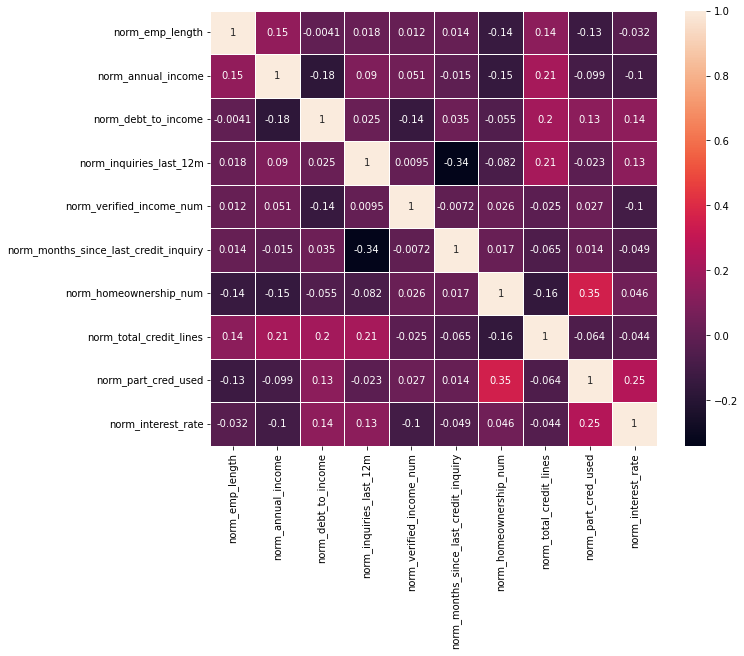

In [17]:
# plotting correlation heatmap
plt.figure(figsize = (10,8))
dataplot = sns.heatmap(heatmap_loans.corr(), annot=True, linewidths=.5)
  
# displaying heatmap
plt.show()

#### My takeaways from the heatmap...
There simply aren't very many strong correlations in this data.  The strongest is a positive correlation between homeownership status and the portion of credit utilized from credit available.  Since the homeownership status began as categorical data and was converted to 0 for 'mortgage', 1 for 'rent', and 2 for 'own', I'm not sure how valuable this information is.  If I hadn't used .factorize to convert my data, I probably would have assigned 0 to 'rent' and 1 to 'mortgage' since there is a progression suggested by these three categories in homeownership.  Then it may be useful to see how a person's movement along the homeownership continuum may be related to the portion of available credit they utilize.

There was also a strong(ish) negative correlation between the number of credit inquiries in the last 12 months and the number of months since the last credit inquiry.  This seems reasonable, since a higher number of credit inquiries in the past 12 months would be related to a smaller amount of time since the most recent inquiry.

All in all, none of the correlations were significantly strong.

##### 4.	Create a histogram showing the frequency of loan_amounts. Describe what you see. Pay special attention to bin sizes, and clearly describe how you chose your bin sizes. 

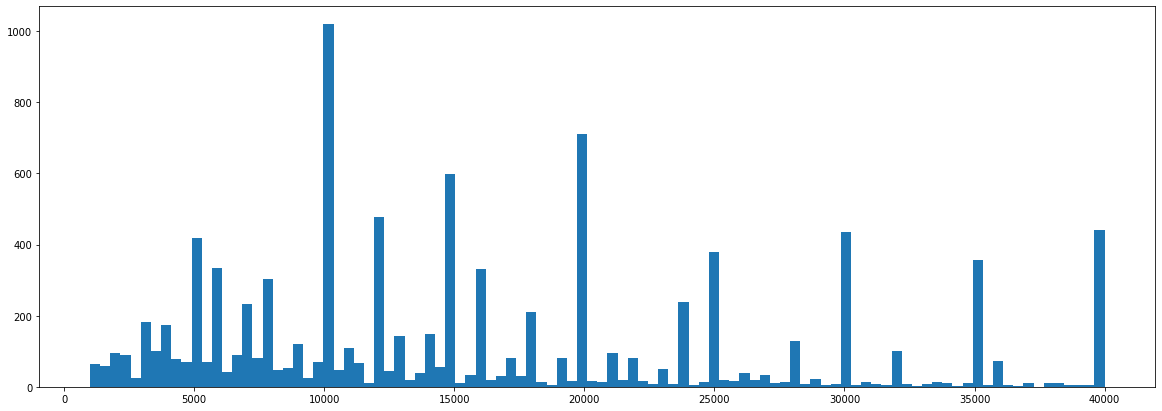

In [18]:
# Creating histogram
fig, ax = plt.subplots(figsize =(20, 7))
ax.hist(loans_df['loan_amount'], bins = 100)
 
# Show plot
plt.show()

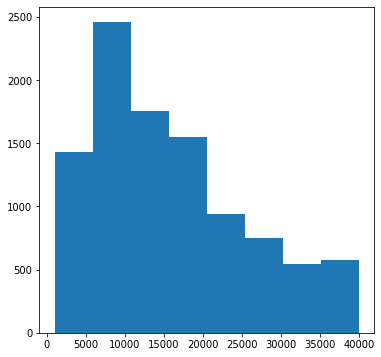

In [19]:
# Creating histogram
fig, ax = plt.subplots(figsize =(6, 6))
ax.hist(loans_df['loan_amount'], bins = 8)
 
# Show plot
plt.show()

Since there are 10000 data points and the square root of 10000 is 100, the recommended number of bins would be 100. Personally, I started with 10 bins at first because that has become pretty standard for me.  Then I increased it to 20 bins, and it was neat to see the display change drastically by changing from 10 to 20 bins.  With 10 bins, there were no visible spikes in the data.  With 20 bins, the spikes were visible.  This makes a lot of sense because loan amounts tend to be rounded to the nearest thousand (or ten-thousand).  Examining this dataset with 100 bins, you can see that the spikes are essentially at 5000 dollar increments. So in my opinions, a histogram with 8 bins (40000 dollar max divided by 5000 dollar increments) would be the best way to visualize the data.

##### 5.	Create a new column called region that uses a lambda and shows which part of the US someone lives in, split up into Pacific, Plains, Midwest, Northeast, and South. Consider having your lambda call a function. 

In [20]:
# Method 1:

start_time = time.perf_counter_ns()

# Define regions
pacific = ['AK', 'CA', 'HI', 'OR', 'WA']
west = ['ID', 'MT', 'NV', 'WY', 'UT', 'CO', 'NM', 'AZ']
midwest = ['ND', 'SD', 'NE', 'KS', 'IL', 'IN', 'IA', 'MI', 'MN', 'MO', 'OH', 'WI']
northeast = ['ME', 'CT', 'MA', 'NH', 'NJ', 'NY', 'PA', 'VT', 'RI']
south = ['TX', 'OK','AR','LA','MS','AL','TN','KY','GA','FL', 'NC','SC', 'VA', 'WV', 'MD', 'DE']

# Define lambda to categorize by region
categorize = lambda x: 'Pacific' if x in pacific else ('West' if x in west else ('Midwest' if x in midwest else ('Northeast' if x in northeast else 'South')))

# Create list with assigned regions
region_list_1 = []
for state in loans_df['state']:
    region_list_1.append(categorize(state))

# Make list into new column in df
loans_df['region']=region_list_1

end_time = time.perf_counter_ns()
print(f"Execution Time in Nanoseconds : {end_time - start_time}" )

loans_df.head()

Execution Time in Nanoseconds : 9317900


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,paid_total,paid_principal,paid_interest,paid_late_fees,verified_income_num,disbursement_method_num,application_type_num,verification_income_joint_num,homeownership_num,region
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,0,NaN,...,1999.33,984.14,1015.19,0.0,0,0,0,0,0,Northeast
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,0,NaN,...,499.12,348.63,150.49,0.0,1,0,0,0,1,Pacific
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,0,NaN,...,281.80,175.37,106.43,0.0,2,0,0,0,1,Midwest
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,0,NaN,...,3312.89,2746.74,566.15,0.0,1,0,0,0,1,Northeast
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,2324.65,1569.85,754.80,0.0,0,0,1,1,1,Pacific


##### a.	Is there a better way to do this than with a lambda? 

In [21]:
# Method 2:

start_time = time.perf_counter_ns()

# Use a dictionary as a reference and use list comprehension
reference_dict = {'pacific' : ['AK', 'CA', 'HI', 'OR', 'WA'], 
                  'west' : ['ID', 'MT', 'NV', 'WY', 'UT', 'CO', 'NM', 'AZ'], 
                  'midwest' : ['ND', 'SD', 'NE', 'KS', 'IL', 'IN', 'IA', 'MI','MN','MO','OH','WI'], 
                  'northeast' : ['ME', 'CT', 'MA', 'NH', 'NJ', 'NY', 'PA', 'VT', 'RI'], 
                  'south' : ['TX', 'OK','AR','LA','MS','AL','TN','KY','GA','FL','NC','SC','VA','WV','MD','DE']}

region_list_2 = []
for i in range(len(loans_df)):
    region_list_2.append([k for k,v in reference_dict.items() if loans_df['state'][i] in v])

loans_df['region2']=region_list_2

end_time = time.perf_counter_ns()
print(f"Execution Time in Nanoseconds : {end_time - start_time}" )

loans_df.head()

Execution Time in Nanoseconds : 209629900


,emp_title,emp_length,state,homeownership,annual_income,verified_income,debt_to_income,annual_income_joint,verification_income_joint,debt_to_income_joint,...,paid_principal,paid_interest,paid_late_fees,verified_income_num,disbursement_method_num,application_type_num,verification_income_joint_num,homeownership_num,region,region2
0,global config engineer,3.0,NJ,MORTGAGE,90000.0,Verified,18.01,NaN,0,NaN,...,984.14,1015.19,0.0,0,0,0,0,0,Northeast,[northeast]
1,warehouse office clerk,10.0,HI,RENT,40000.0,Not Verified,5.04,NaN,0,NaN,...,348.63,150.49,0.0,1,0,0,0,1,Pacific,[pacific]
2,assembly,3.0,WI,RENT,40000.0,Source Verified,21.15,NaN,0,NaN,...,175.37,106.43,0.0,2,0,0,0,1,Midwest,[midwest]
3,customer service,1.0,PA,RENT,30000.0,Not Verified,10.16,NaN,0,NaN,...,2746.74,566.15,0.0,1,0,0,0,1,Northeast,[northeast]
4,security supervisor,10.0,CA,RENT,35000.0,Verified,57.96,57000.0,Verified,37.66,...,1569.85,754.80,0.0,0,0,1,1,1,Pacific,[pacific]


##### b.	Either use two different lambdas or a lambda and a different technique and see which one is more performant. Explain your findings in the markdown. 

I inserted a timer in the code for both methods (see above).  The lambda was significantly faster than the dictionary list comprehension...not to mention that my dictionary method returned each value as a one-element 'list'.  The dictionary method took 50% longer to execute.

##### 6.	Create subplot histograms to show if loan_amounts differ by region. Summarize your findings.

In [46]:
# Create data groups by region

print(loans_df.groupby('region'))

pacific_series = loans_df.groupby('region')['loan_amount'].get_group('Pacific')
west_series = loans_df.groupby('region')['loan_amount'].get_group('West')
midwest_series = loans_df.groupby('region')['loan_amount'].get_group('Midwest')
northeast_series = loans_df.groupby('region')['loan_amount'].get_group('Northeast')
south_series = loans_df.groupby('region')['loan_amount'].get_group('South')

([<matplotlib.axis.YTick at 0x211aedac580>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

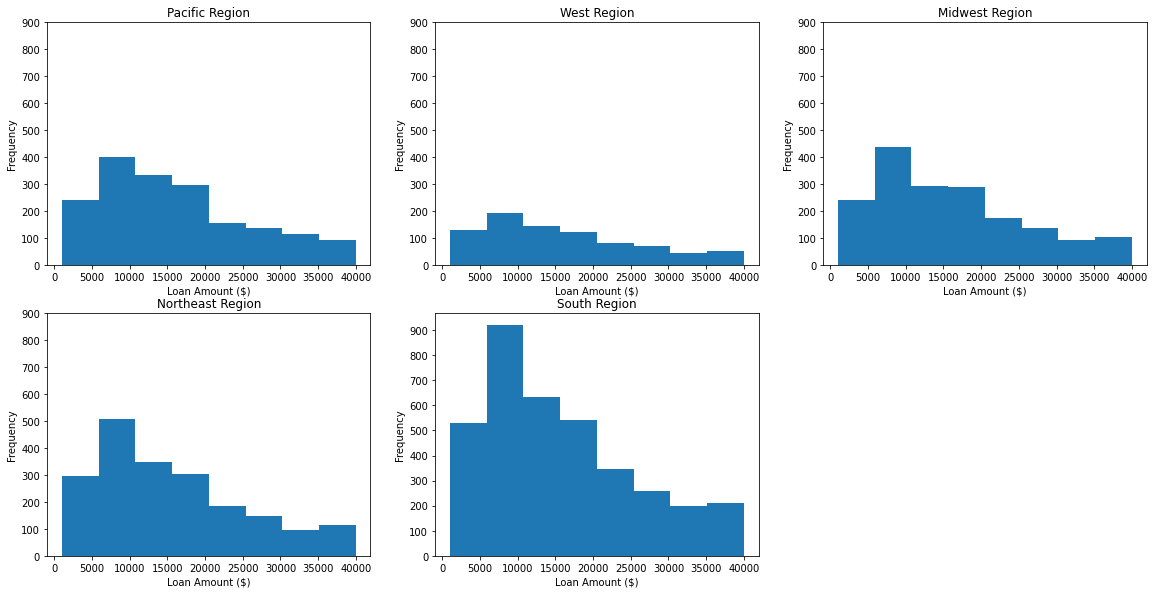

In [53]:
# Create histogram subplots

fig, ax = plt.subplots(figsize =(16, 8))
fig.tight_layout(h_pad=2)

plt.subplot(2,3,1)
plt.hist(pacific_series, bins = 8)
plt.title('Pacific Region')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1000, step=100))  # same y ticks for all graphs to enable comparison

plt.subplot(2,3,2)
plt.hist(west_series, bins = 8)
plt.title('West Region')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1000, step=100))

plt.subplot(2,3,3)
plt.hist(midwest_series, bins = 8)
plt.title('Midwest Region')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1000, step=100))

plt.subplot(2,3,4)
plt.hist(northeast_series, bins = 8)
plt.title('Northeast Region')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1000, step=100))

plt.subplot(2,3,5)
plt.hist(south_series, bins = 8)
plt.title('South Region')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')
plt.yticks(np.arange(0, 1000, step=100))

After modifying the histograms so that they all share the same y-axis, it becomes obvious that there are more loans in general in the south.  But there is also a greater amount of loans in the 5000 to 10000 dollar range as compared to other bins.  This contrast is greater in the South than in any other region.  The least amount of loans is in the west, where the data is fairly even for all bins.  Of course, there is a slight increase in the 5000 to 10000 dollar range, but not much more than the two bins on either side.  

##### 7.	Think of some questions you want to ask our guests next week. You can ask them anything, just make sure its thoughtful. 

What does a typical work day look like in your profession?

How much of your work day involves collaboration with others as opposed to individualized tasks.

Does your profession allow you to have work/life balance?

What is the most gratifying part of your profession, in your opinion?

# DataCamp

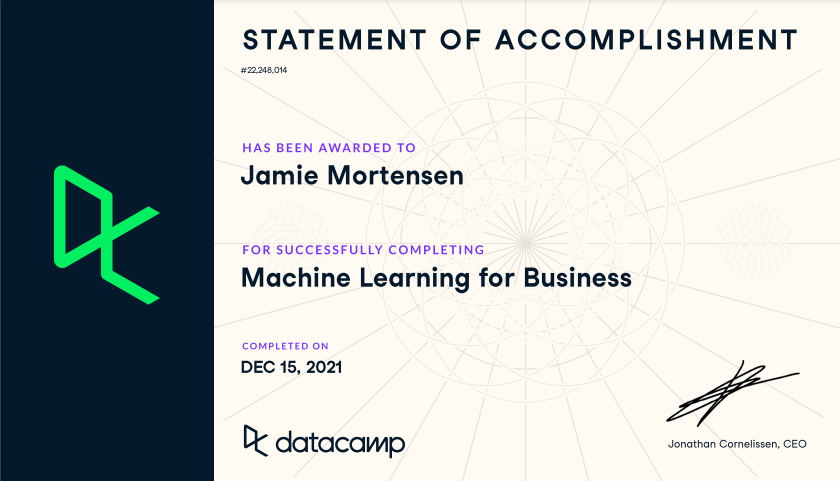

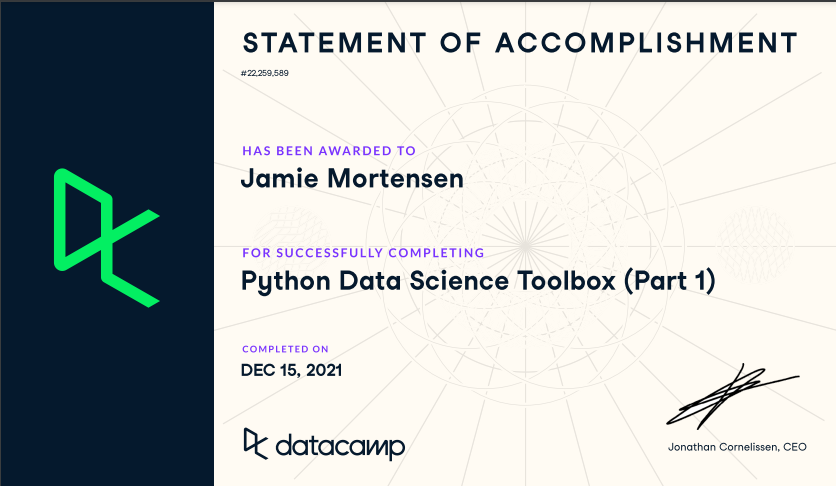